In [1]:
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data'

In [3]:
import requests, zipfile

In [8]:
import io

In [9]:
from io import StringIO

In [10]:
res = requests.get(url).content

In [12]:
import pandas as pd

In [13]:
mushroom = pd.read_csv(io.StringIO(res.decode('utf-8')),header=None)

In [15]:
mushroom.columns =['classes','cup_surface','cap_share','cap_color','odor','bruises','gill_attachment','gill_spacing','gill_size','gill_color','stalk_shape','stalk_root','stalk_surface_above_ring','stalk_surface_below_ring','stalk_color_above_ring','stalk_color_below_ring','veil_type','veil_color','ring_number','ring_type','spore_print_color','population','habitat']

In [16]:
mushroom.head()

,classes,cup_surface,cap_share,cap_color,odor,bruises,gill_attachment,gill_spacing,gill_size,gill_color,...,stalk_surface_below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [20]:
mushroom_dummy = pd.get_dummies(mushroom[['gill_color','gill_attachment','odor','cap_color']])

In [21]:
mushroom_dummy.head()

,gill_color_b,gill_color_e,gill_color_g,gill_color_h,gill_color_k,gill_color_n,gill_color_o,gill_color_p,gill_color_r,gill_color_u,...,cap_color_b,cap_color_c,cap_color_e,cap_color_g,cap_color_n,cap_color_p,cap_color_r,cap_color_u,cap_color_w,cap_color_y
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [23]:
mushroom_dummy['flg'] = mushroom['classes'].map(lambda x: 1 if x =='p' else 0)

In [26]:
mushroom_dummy.groupby(['cap_color_c','flg'])['flg'].count().unstack()

flg,0,1
cap_color_c,,
0,4176,3904
1,32,12


In [28]:
mushroom_dummy.groupby(['gill_color_b','flg'])['flg'].count().unstack()

flg,0,1
gill_color_b,,
0,4208.0,2188.0
1,NaN,1728.0


エントロピー計算

In [30]:
import numpy as np

In [31]:
-(0.5 * np.log2(0.5) + 0.5 * np.log2(0.5))

1.0

In [32]:
-(0.001 * np.log2(0.001) + 0.999 * np.log2(0.999))

0.011407757737461138

In [33]:
def calc_entropy(p):
    return - (p * np.log2(p) + (1 - p) * np.log2(1 - p))

In [35]:
#pの値を0.001から0.999まで0.01刻みで動かす
p = np.arange(0.001, 0.999,0.01)

In [36]:
import matplotlib.pyplot as plt

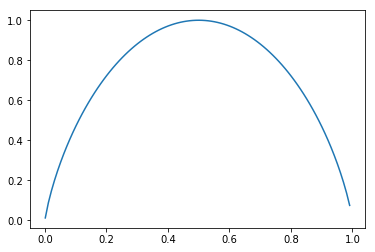

In [37]:
plt.plot(p, calc_entropy(p))

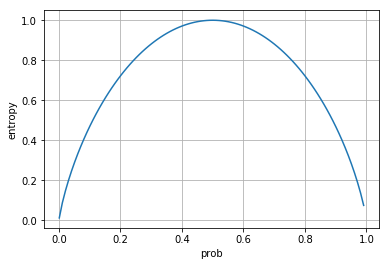

In [40]:
plt.plot(p, calc_entropy(p))
plt.xlabel('prob')
plt.ylabel('entropy')
plt.grid(True)

In [41]:
mushroom_dummy.groupby('flg')['flg'].count

<bound method SeriesGroupBy.count of <pandas.core.groupby.groupby.SeriesGroupBy object at 0x000000F90E5E3780>>

In [42]:
entropy_init = -(0.518 * np.log2(0.518) + 0.482 * np.log2(0.482))
print('毒キノコデータのエントロピーの初期値： {:3f}'.format(entropy_init))

毒キノコデータのエントロピーの初期値： 0.999065


In [43]:
mushroom_dummy.groupby(['cap_color_c','flg'])['flg'].count().unstack()

flg,0,1
cap_color_c,,
0,4176,3904
1,32,12


In [44]:
#cap_colorがcでない場合のエントロピー
p1 = 4176/(4176 + 3904)
p2 = 1 - p1
entropy_c0 = -(p1*np.log2(p1)+p2*np.log2(p2))
print('entropy_c0: {:.3f}'.format(entropy_c0))

entropy_c0: 0.999


In [45]:
#cap_colorがcである場合のエントロピー
p1 = 32/(32 + 12)
p2 = 1-p1
entropy_c1 = -(p1*np.log2(p1)+p2*np.log2(p2))
print('entropy_c1: {:.3f}'.format(entropy_c1))

entropy_c1: 0.845


In [46]:
entropy_after = (4176+3904)/8124*entropy_c0 + (32+12)/8124*entropy_c1
print('データ分割後の平均エントロピー: {:.3f}'.format(entropy_after))

データ分割後の平均エントロピー: 0.998


In [47]:
print('変数cap_colorの分割によって得られる情報利得: {:.3f}'.format(entropy_init - entropy_after))

変数cap_colorの分割によって得られる情報利得: 0.001


In [49]:
mushroom_dummy.groupby(['gill_color_b','flg'])['flg'].count().unstack()

flg,0,1
gill_color_b,,
0,4208.0,2188.0
1,NaN,1728.0


In [50]:
#gill_colorがbでない場合のエントロピー
p1 = 4208/(4208+2188)
p2 = 1 - p1
entropy_b0 = -(p1*np.log2(p1) + p2*np.log2(p2))

In [51]:
#gill_colorがbである場合のエントロピー
p1 = 0/(0+1728)
p2 = 1- p1
entropy_b1 = -(p2*np.log2(p2))

In [52]:
entropy_after = (4208+2188)/8124*entropy_b0 + (0+1728)/8124*entropy_b1
print('変数gill_colorの分割によって得られる情報利得: {:.3f}'.format(entropy_init - entropy_after))

変数gill_colorの分割によって得られる情報利得: 0.269


決定木のモデル構築

In [53]:
from sklearn.tree import DecisionTreeClassifier

In [54]:
from sklearn.model_selection import train_test_split

In [55]:
#データ分割
x = mushroom_dummy.drop('flg',axis=1)
y = mushroom_dummy['flg']
x_train,x_test,y_train,y_test = train_test_split(x,y, random_state=0)

In [58]:
#決定木クラスの初期化と学習
model = DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=0)
model.fit(x_train,y_train)
print('正解率(train):{:.3f}'.format(model.score(x_train,y_train)))
print('正解率(test):{:.3f}'.format(model.score(x_test,y_test)))

正解率(train):0.883
正解率(test):0.894


In [59]:
from sklearn import tree

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import K